## ImageNet UAP - Attack Generation
We generate (via SGD), visualize, and evaluate the following UAPs:
1. Untargeted UAP
2. Targeted UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch

sys.path.append(os.path.realpath('..'))

from attacks import uap_sgd
from utils import loader_imgnet, model_imgnet, evaluate

dir_data = '/data/ilsvrc2012/val'
dir_uap = '../uaps/imagenet/'
loader = loader_imgnet(dir_data, 5000, 100)

In [2]:
# load model
model = model_imgnet('resnet50')

Model loading complete.


## 1. Untargeted UAP

In [3]:
nb_epoch = 10 # run for more epochs to get a stronger UAP
eps = 10 / 255
uap, losses = uap_sgd(model, loader, nb_epoch, eps)

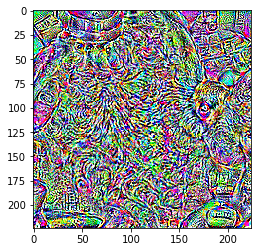

In [4]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

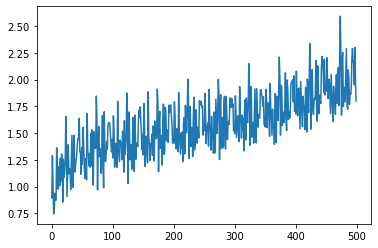

In [5]:
# plot loss
plt.plot(losses)

In [6]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.544


## 2. Targeted UAP

In [7]:
nb_epoch = 10
eps = 10 / 255
y_target = 7
uap, losses = uap_sgd(model, loader, nb_epoch, eps, y_target = y_target)

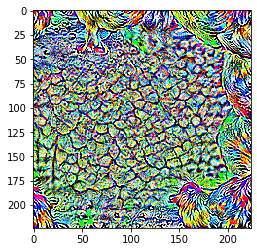

In [8]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

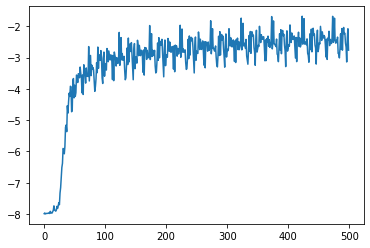

In [9]:
# plot loss
plt.plot(losses)

In [10]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, loader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.2252
Targeted success rate: 0.6454
